<a href="https://colab.research.google.com/github/moodv/data-analytics-portfolio/blob/main/Project2-online-retail/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**1. Business Problem:** An online retail company wants to understand its sales performance and identify key customer segments to inform its marketing strategy for the upcoming year.

**2. Objectives:** This analysis will explore sales patterns across different geographies and times, identify top-performing products, and use RFM segmentation to categorize customers into actionable groups.

**3. Dataset Description:** The data comes from the Online Retail dataset (UCI Machine Learning Repository), which contains real transactional records from a UK-based online retailer. The company mainly sold unique all-occasion gifts.
Timeframe: December 1, 2010 – December 9, 2011 (almost one year of sales)
link: https://archive.ics.uci.edu/dataset/352/online+retail

# **Loading & Info On The Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
df = pd.read_excel('OnlineRetail.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


1. **Negative Quantities:** These likely represent returned orders.

2. **Zero UnitPrice:** These transactions generate no revenue and may be data errors or special items.

3. **Null CustomerID:** A significant number of transactions are missing customer information, which will impact customer-level analysis."

In [6]:
df.isnull().sum()
df.duplicated().sum()

print(f"Nulls: {df.isnull().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
df.head(20)

Nulls: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Duplicates: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# **Pre-Processing**

In [7]:
# Standardize text columns
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

# Drop nulls in Description
df = df.dropna(subset=['Description'])

# Drop exact duplicate rows
df = df.drop_duplicates()

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype('Int64')

# Add this before calculating TotalPrice
df = df[df['UnitPrice'] > 0]

# Add TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract date features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour




In [8]:
df.info()
df.head()
print(f"Nulls: {df.isnull().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 534129 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534129 non-null  object        
 1   StockCode    534129 non-null  object        
 2   Description  534129 non-null  object        
 3   Quantity     534129 non-null  int64         
 4   InvoiceDate  534129 non-null  datetime64[ns]
 5   UnitPrice    534129 non-null  float64       
 6   CustomerID   401564 non-null  Int64         
 7   Country      534129 non-null  object        
 8   TotalPrice   534129 non-null  float64       
 9   Year         534129 non-null  int32         
 10  Month        534129 non-null  int32         
 11  Day          534129 non-null  int32         
 12  Weekday      534129 non-null  object        
 13  Time         534129 non-null  object        
 14  Hour         534129 non-null  int32         
dtypes: Int64(1), datetime64[ns](1), float64

There are 133K nulls in CustomerID, this is around 25% of the customers.
We will leave them for now and filter them when doing RFM analysis.


In [9]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10,5)

# **Geographical Analysis**

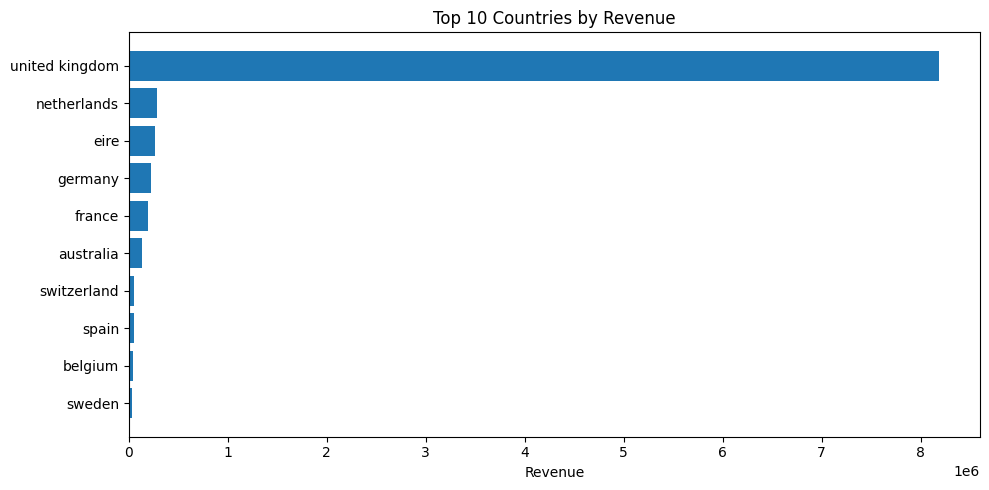

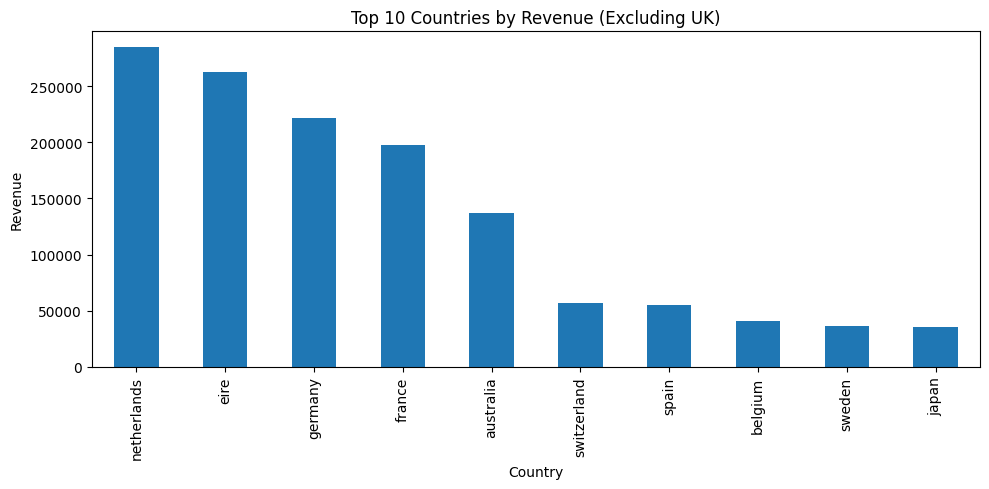

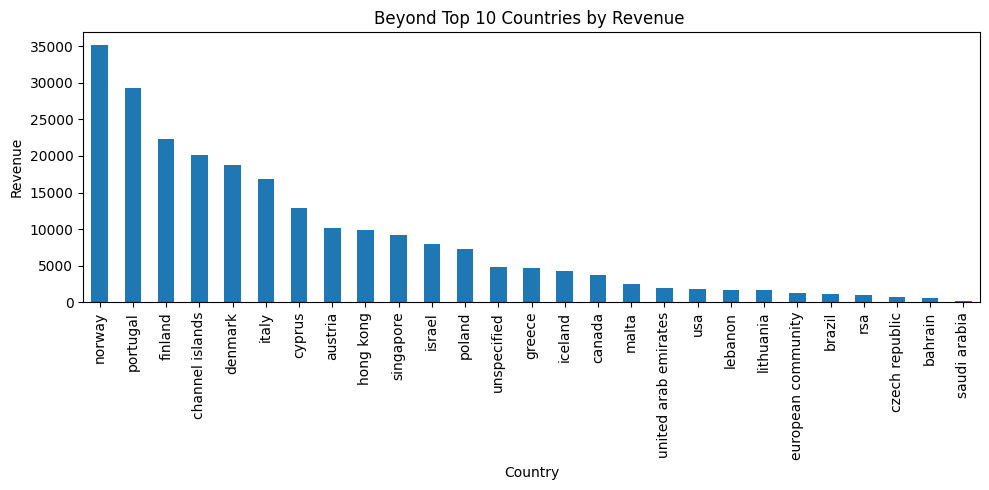

,TotalPrice
Country,
united kingdom,8189252.304


,TotalPrice
Country,
netherlands,284661.54
eire,262993.38
germany,221509.47
france,197317.11
australia,137009.77
switzerland,56363.05
spain,54756.03
belgium,40910.96
sweden,36585.41


,TotalPrice
Country,
norway,35163.46
portugal,29302.97
finland,22326.74
channel islands,20076.39
denmark,18768.14
...,...
brazil,1143.60
rsa,1002.31
czech republic,707.72


UK contribution: 84.01% of total revenue
Top 10 contribution: 13.62% of total revenue
Other countries (beyond top 10): 2.37% of total revenue


In [10]:
# top countries by revenue
countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Top 10 countries
top_countries = countries.head(10)
top_countries_without_uk = countries.head(11).drop('united kingdom')
other_countries = countries.iloc[11:]

# Plot
plt.figure()
plt.barh(top_countries.index[::-1], top_countries.values[::-1])
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

top_countries_without_uk.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Revenue (Excluding UK)")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

other_countries.plot(kind='bar', figsize=(10,5), title="Beyond Top 10 Countries by Revenue ")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

display(countries.head(1))
display(top_countries_without_uk)
display(other_countries)


# % of revenue from top country vs rest
top_share = countries.iloc[0] / countries.sum() * 100
print(f"UK contribution: {top_share:.2f}% of total revenue")

top10_share = top_countries_without_uk.sum() / countries.sum() * 100
print(f"Top 10 contribution: {top10_share:.2f}% of total revenue")

# Long tail check
other_share = other_countries.sum() / countries.sum() * 100
print(f"Other countries (beyond top 10): {other_share:.2f}% of total revenue")

# **🌍 Key Insights**

* UK dominates revenue, contributing ~84% of total sales. This clearly shows that the business is heavily dependent on its domestic market.

* The top 10 international markets (e.g., Netherlands, Ireland, Germany, France, Australia) together account for ~13.6% of revenue.

* All other countries combined contribute only ~2.4%, indicating minimal penetration outside of the UK and the top 10.

**Recommendations:** If the company wants to grow, international expansion outside the UK is a major opportunity as high dependency on the domestic market presents a risk. The business should focus growth efforts on the top 3 performing international markets: Netherlands, Ireland, and Germany."

# **Date & Time Analysis**

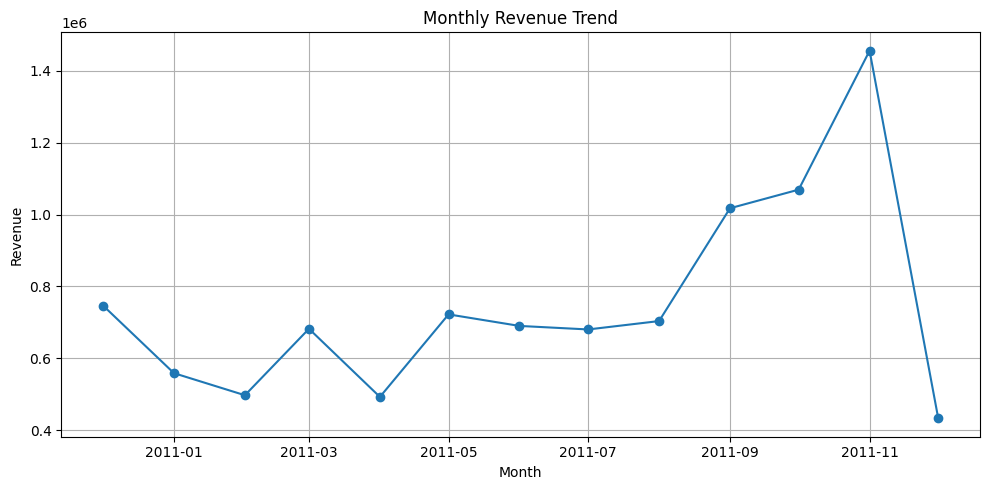

,month,revenue
0,2010-12-01,746723.610
1,2011-01-01,558448.560
2,2011-02-01,497026.410
3,2011-03-01,682013.980
4,2011-04-01,492367.841
5,2011-05-01,722094.100
6,2011-06-01,689977.230
7,2011-07-01,680156.991
8,2011-08-01,703510.580
9,2011-09-01,1017596.682


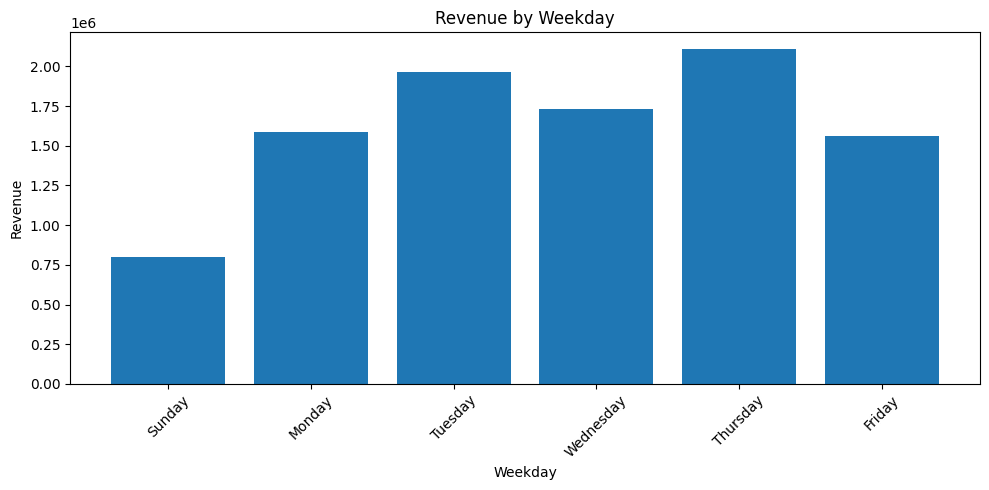

,Weekday,revenue
0,Sunday,798659.461
1,Monday,1584895.301
2,Tuesday,1965703.611
3,Wednesday,1730088.430
4,Thursday,2108701.530
5,Friday,1560082.741
6,Saturday,NaN


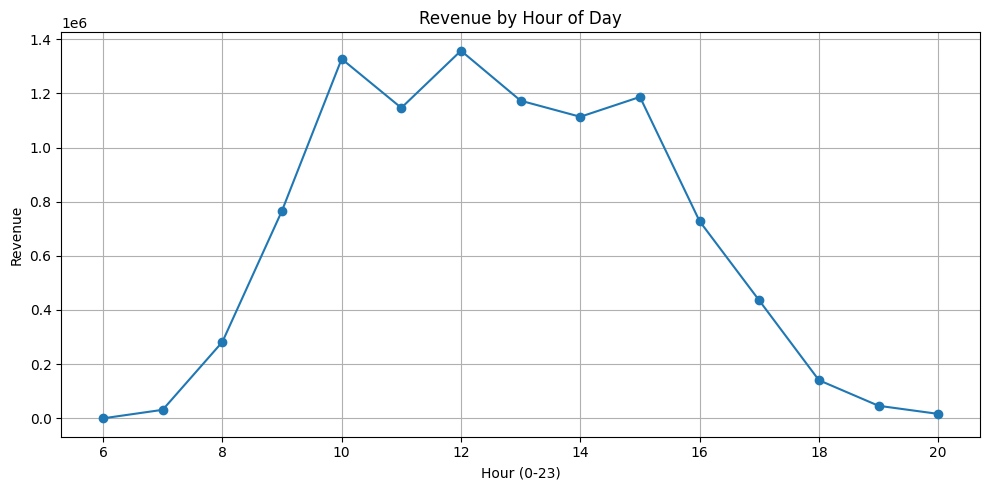

,Hour,revenue
0,6,-497.350
1,7,31009.320
2,8,281723.020
3,9,766524.171
4,10,1327329.891
5,11,1146457.490
6,12,1357595.120
7,13,1172985.870
8,14,1113532.861
9,15,1186819.410


In [11]:
# monthly revenue trend (big picture)
monthly = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().sort_index()
monthly.index = monthly.index.to_timestamp()
plt.figure()
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
display(monthly.reset_index().rename(columns={'InvoiceDate':'month','TotalPrice':'revenue'}).head(12))


# Busy Weekdays (Saturday is OFF/ =NaN)
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
weekday = df.groupby('Weekday')['TotalPrice'].sum().reindex(weekday_order)
plt.figure()
plt.bar(weekday.index, weekday.values)
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
display(weekday.reset_index().rename(columns={'TotalPrice':'revenue'}))


# hourly revenue pattern
hour = df.groupby('Hour')['TotalPrice'].sum().sort_index()
plt.figure()
plt.plot(hour.index, hour.values, marker='o')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
display(hour.reset_index().rename(columns={'TotalPrice':'revenue'}))


# **🕒 Key Insights**

**1. By Month**

* Revenue starts at £746K in Dec 2010, dips in Jan & Feb 2011, then rises again.

* Clear seasonality: sharp revenue peak in Nov 2011 (£1.45M), likely due to holiday shopping.

* After a mid-year dip (Apr–Aug), revenue accelerates strongly from Sep to Nov 2011.

**📌 Insight:** The business is highly seasonal, with (especially Nov) driving the largest share of sales.

**2. By Weekday**

* Revenue steadily grows from Sunday (£0.8M) through the week, peaking on Thursday (£2.1M).

* Friday drops slightly (£1.53M).

* Saturday is NaN, indicates that its non-trading day.

**📌 Insight:** The company’s sales are weekend-light, weekday-heavy, with Thursday as the top sales day. This pattern indicates that this is a B2B (Business-to-Business) rather than B2C (Business-to-Consumer) model, as consumer retail is typically busiest on weekends.

**3. By Hour of Day**

* Negligible sales before 7 AM.

* Sales rise sharply from 8 AM, peak between 10 AM–3 PM, with the absolute maximum at 12 noon (£1.35M).

* Revenue tapers off after 4 PM, almost flat by 7–8 PM.

**📌 Insight:** This is a daytime business, with peak activity around midday to early afternoon, supporting the idea that it’s B2B-focused wholesale, not late-night consumer shopping.

# **Product & Basket Analysis**

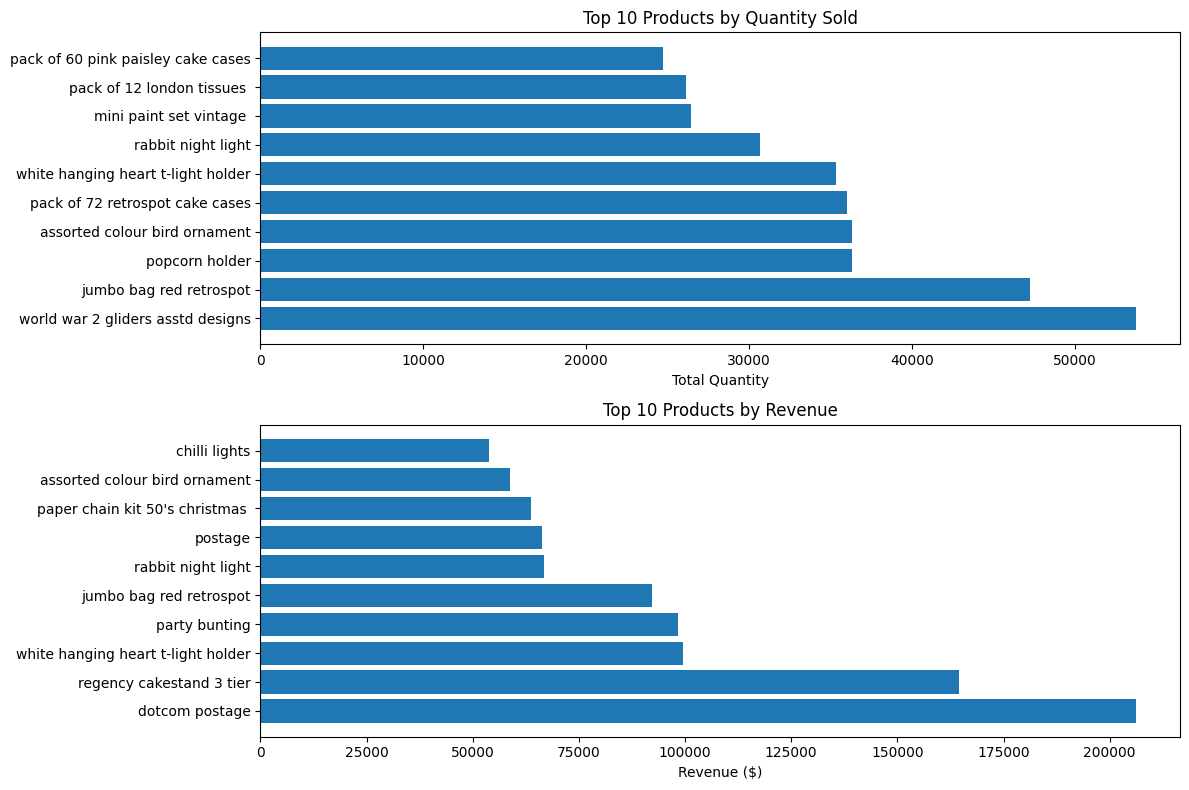

,top_qty,top_rev
Description,,
assorted colour bird ornament,36282.0,58792.42
chilli lights,,53746.66
dotcom postage,,206245.48
jumbo bag red retrospot,47256.0,92175.79
mini paint set vintage,26437.0,
pack of 12 london tissues,26095.0,
pack of 60 pink paisley cake cases,24719.0,
pack of 72 retrospot cake cases,36016.0,
paper chain kit 50's christmas,,63715.24


In [29]:
# Top products by quantity and revenue
top_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_rev = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.barh(range(len(top_qty)), top_qty.values)
plt.yticks(range(len(top_qty)), [desc[:50] + '...' if len(desc) > 50 else desc for desc in top_qty.index])
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")

plt.subplot(2,1,2)
plt.barh(range(len(top_rev)), top_rev.values)
plt.yticks(range(len(top_rev)), [desc[:50] + '...' if len(desc) > 50 else desc for desc in top_rev.index])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue ($)")

plt.tight_layout()
plt.show()

display(pd.DataFrame({'top_qty': top_qty, 'top_rev': top_rev}).fillna(''))


Number of return rows: 9251
Gross Revenue (before returns): $10,642,110.80
Net Revenue (after returns): $9,748,131.07
Revenue lost to returns: $893,979.73 (8.40% of gross)


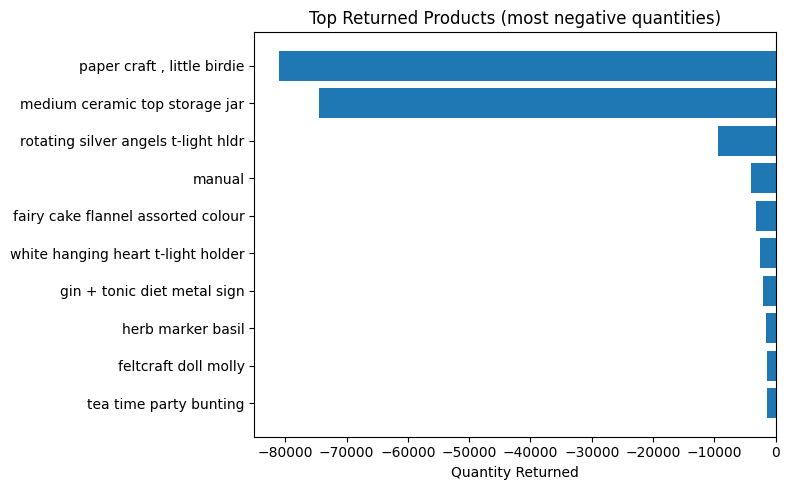

,Quantity
Description,
"paper craft , little birdie",-80995
medium ceramic top storage jar,-74494
rotating silver angels t-light hldr,-9376
manual,-4066
fairy cake flannel assorted colour,-3150
white hanging heart t-light holder,-2578
gin + tonic diet metal sign,-2030
herb marker basil,-1527
feltcraft doll molly,-1447


In [31]:
# Returns analysis
returns = df[df['Quantity'] < 0]
print("Number of return rows:", returns.shape[0])

# Gross vs Net Revenue
gross_revenue = df[df['Quantity'] > 0]['TotalPrice'].sum()
net_revenue = df['TotalPrice'].sum()  # includes negatives
returns_value = gross_revenue - net_revenue
returns_pct = (returns_value / gross_revenue) * 100

print(f"Gross Revenue (before returns): ${gross_revenue:,.2f}")
print(f"Net Revenue (after returns): ${net_revenue:,.2f}")
print(f"Revenue lost to returns: ${returns_value:,.2f} ({returns_pct:.2f}% of gross)")

# Top returned products
if returns.shape[0] > 0:
    returns_by_product = returns.groupby('Description')['Quantity'].sum().sort_values().head(10)

    plt.figure(figsize=(8,5))
    plt.barh(returns_by_product.index[::-1], returns_by_product.values[::-1])
    plt.title("Top Returned Products (most negative quantities)")
    plt.xlabel("Quantity Returned")
    plt.tight_layout()
    plt.show()

    display(returns_by_product)
else:
    print("No negative-quantity rows (returns) found.")


**Recommendation:** The high return rate on fragile items like ceramic jars and paper crafts suggests a need to review packaging and shipping procedures to reduce damages and revenue loss.

In [14]:
# Basket analysis with outlier detection
basket = df.groupby('InvoiceNo').agg({'Quantity': 'sum', 'TotalPrice': 'sum'})

# Outlier detection thresholds ---
Q1_qty, Q3_qty = basket['Quantity'].quantile([0.25, 0.75])
IQR_qty = Q3_qty - Q1_qty
upper_qty = Q3_qty + 1.5 * IQR_qty

Q1_rev, Q3_rev = basket['TotalPrice'].quantile([0.25, 0.75])
IQR_rev = Q3_rev - Q1_rev
upper_rev = Q3_rev + 1.5 * IQR_rev

# Flag wholesale/outlier invoices ---
basket['IsWholesale'] = (basket['Quantity'] > upper_qty) | (basket['TotalPrice'] > upper_rev)

# Average basket stats (retail only) ---
wholesale_basket = basket[basket['IsWholesale'] == True]
retail_basket = basket[basket['IsWholesale'] == False]
avg_items = retail_basket['Quantity'].mean()
avg_order_value = retail_basket['TotalPrice'].mean()

print("Basket Analysis (Excluding Wholesale/Outliers)")
print(f"Avg items per invoice: {avg_items:.2f}")
print(f"Avg order value: {avg_order_value:.2f}")
print(f"Wholesale/Outlier invoices flagged: {basket['IsWholesale'].sum()} out of {len(basket)}")

print("\nTop 10 Retail Invoices by Revenue :")
display(retail_basket.sort_values('TotalPrice', ascending=False).head(10))

print("\nTop 10 Wholesale Invoices by Revenue :")
display(wholesale_basket.sort_values('TotalPrice', ascending=False).head(10))

Basket Analysis (Excluding Wholesale/Outliers)
Avg items per invoice: 120.30
Avg order value: 199.80
Wholesale/Outlier invoices flagged: 2315 out of 23796

Top 10 Retail Invoices by Revenue :


,Quantity,TotalPrice,IsWholesale
InvoiceNo,,,
540396,404,969.24,False
539985,387,968.77,False
553942,336,968.50,False
573289,461,968.45,False
561355,216,968.40,False
573388,520,965.78,False
564820,275,964.92,False
567653,569,964.83,False
557214,544,964.77,False



Top 10 Wholesale Invoices by Revenue :


,Quantity,TotalPrice,IsWholesale
InvoiceNo,,,
581483,80995,168469.60,True
541431,74215,77183.60,True
574941,14149,52940.94,True
576365,13956,50653.91,True
556444,60,38970.00,True
567423,12572,31698.16,True
556917,15049,22775.93,True
572209,1920,22206.00,True
567381,6760,22104.80,True


# **🛒 Product, Returns & Basket Insights**

**1. Products**

* Bestsellers by volume included assorted colour bird ornament (36k units) and jumbo bag red retrospot (47k units).

* Bestsellers by revenue were high-ticket or repeat-cost items such as dotcom postage (£206k) and regency cakestand 3 tier (£164k).

* A few products dominate sales, while the long tail contributes smaller shares.

**2. Basket Structure**

* After excluding wholesale outliers, the average retail basket contained:

~110 items per invoice
~£194 average order value
* Wholesales invoices (2,290 flagged) show extreme spikes — some exceeding 80k items.
* This separation highlights two distinct customer groups: predictable retail vs. large-scale wholesale.

**3. Returns & Adjusted Revenue**

* Gross revenue (before returns): £10.62M
* Net revenue (after returns): £9.73M
* Returns reduced revenue by £894k (8.42%).
* High-return products were mainly fragile or problematic items (paper craft birds, ceramic jars, candles, etc.).
* This suggests either product quality issues or supply chain errors, not normal consumer behavior.

# **Customer Analysis (RFM)**

**RFM Analysis is a proven customer segmentation technique that evaluates customers across three key dimensions:**

• **RECENCY (R):** How recently did the customer make their last purchase?
  - More recent customers are more likely to respond to marketing efforts
  - Measured in days since last purchase (lower = better)

• **FREQUENCY (F):** How often does the customer make purchases?
  - Frequent buyers show higher engagement and loyalty
  - Measured as number of unique orders/transactions

• **MONETARY (M):** How much money does the customer spend?
  - Higher spending customers contribute more to revenue
  - Measured as total spend across all transactions

**WHY RFM IS VALUABLE:**
- Simple yet powerful framework for understanding customer behavior
- Enables targeted marketing campaigns based on customer lifecycle stage  
- Helps identify high-value customers worth retaining
- Provides actionable segments for different business strategies
- Cost-effective way to maximize marketing ROI

**ANALYSIS GOALS:**
1. Segment customers into meaningful business categories (Champions, Loyal, At Risk, etc.)
2. Quantify the value and characteristics of each segment
3. Identify opportunities for customer retention and growth
4. Provide actionable insights for marketing and business strategy


In [21]:
# --- Filter Customers ---
df_customer = df.dropna(subset=['CustomerID']).copy()


# Reference date

ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Base
rfm = df_customer.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (ref_date - x.max()).days),
    frequency=('InvoiceNo', 'nunique'),
    monetary=('TotalPrice', 'sum')
).reset_index()

# Add % contribution
rfm['monetary_pct'] = rfm['monetary'] / rfm['monetary'].sum() * 100

# Remove customers with zero or negative spend (they mess up bins)
valid_rfm = rfm[rfm['monetary'] > 0].copy()

# --- Stable Scoring using rank-based quantiles ---
valid_rfm['R'] = pd.qcut(valid_rfm['recency'], 5, labels=[5,4,3,2,1]).astype(int)
valid_rfm['F'] = pd.qcut(valid_rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
valid_rfm['M'] = pd.qcut(valid_rfm['monetary'], 5, labels=[1,2,3,4,5]).astype(int)

valid_rfm['RFM_Score'] = valid_rfm[['R','F','M']].sum(axis=1)

# Segment Mapping
def segment_map(x):
    if x['RFM_Score'] >= 12:
        return 'Champion'
    elif x['RFM_Score'] >= 9:
        return 'Loyal'
    elif x['RFM_Score'] >= 6:
        return 'Potential Loyalist'
    elif x['RFM_Score'] >= 5:
        return 'At Risk'
    elif x['RFM_Score'] <= 4:
        return 'Lost'
    else:
        return 'Others'

valid_rfm['Segment'] = valid_rfm.apply(segment_map, axis=1)

# --- Customer-Level Returns ---
customer_returns = df_customer[df_customer['Quantity'] < 0].groupby('CustomerID')['TotalPrice'].sum()
valid_rfm = valid_rfm.merge(customer_returns.rename('customer_returns'), on='CustomerID', how='left').fillna({'customer_returns':0})

# Safe return ratio
valid_rfm['return_ratio'] = np.where(
    valid_rfm['monetary'] > 0,
    (valid_rfm['customer_returns'].abs() / valid_rfm['monetary']).clip(upper=1),  # cap at 100%
    np.nan
)

# --- Segment Summary ---
segment_summary = valid_rfm.groupby('Segment').agg(
    total_customers=('CustomerID','count'),
    avg_recency=('recency','mean'),
    avg_frequency=('frequency','mean'),
    avg_monetary=('monetary','mean'),
    total_revenue=('monetary','sum'),
    total_customer_returns=('customer_returns','sum'),
    avg_return_ratio=('return_ratio','mean')
).sort_values('total_revenue', ascending=False)





RFM Segment Summary:
                    total_customers  avg_recency  avg_frequency  avg_monetary  \
Segment                                                                         
Champion                       1259    18.147736      12.042891   5097.489984   
Loyal                           990    54.591919       3.732323   1105.602608   
Potential Loyalist             1199   101.207673       1.879900    485.133679   
At Risk                         343   175.241983       1.274052    292.112948   
Lost                            531   248.804143       1.052731    183.789209   

                    total_revenue  total_customer_returns  avg_return_ratio  
Segment                                                                      
Champion              6417739.890              -241931.45          0.034388  
Loyal                 1094546.582              -214391.63          0.027027  
Potential Loyalist     581675.281               -54864.46          0.027819  
At Risk             

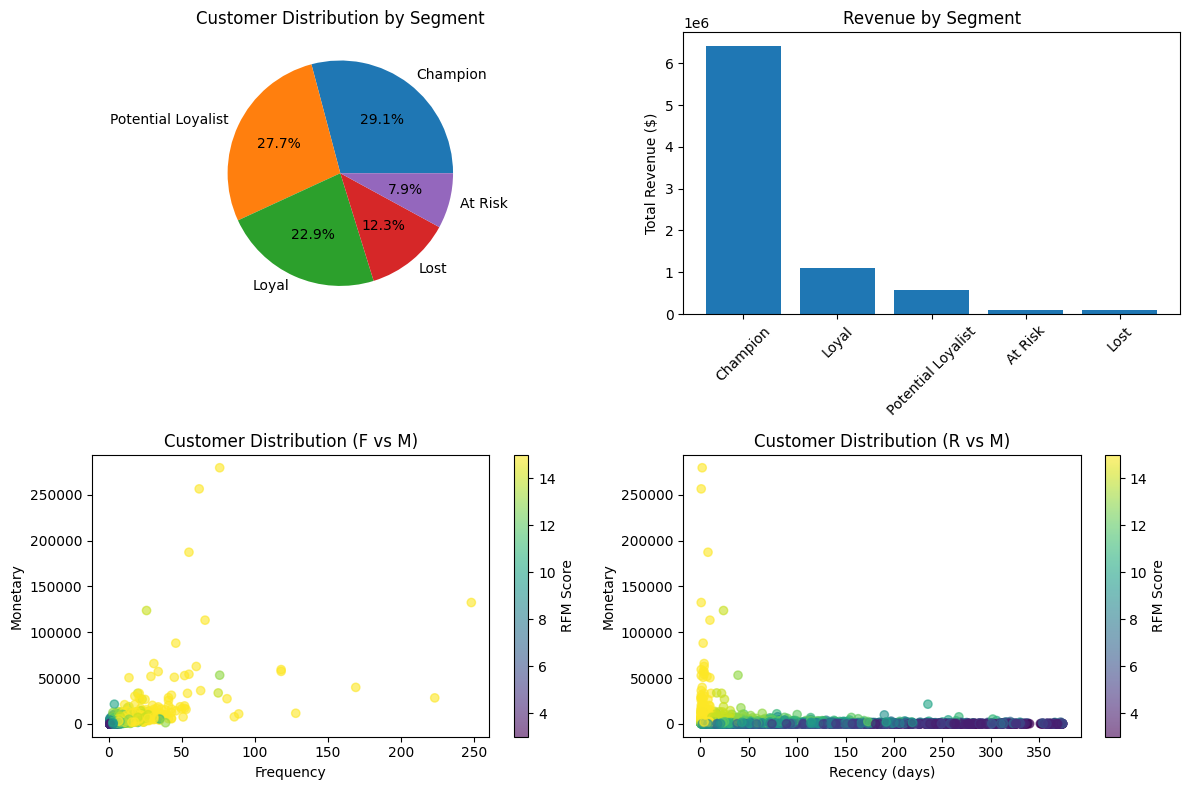

In [23]:
# Sort by total revenue
segment_summary = segment_summary.sort_values('total_revenue', ascending=False)

print("\nRFM Segment Summary:")
print(segment_summary)

print(f"\nOverall Statistics:")
print(f"Total Valid Customers: {len(valid_rfm):,}")
print(f"Total Revenue: ${valid_rfm['monetary'].sum():,.2f}")
print(f"Average Customer Value: ${valid_rfm['monetary'].mean():.2f}")
print(f"Average Recency: {valid_rfm['recency'].mean():.1f} days")
print(f"Average Frequency: {valid_rfm['frequency'].mean():.1f} orders")

print(f"Revenue Lost to Returns: {valid_rfm['customer_returns'].abs().sum():,.2f} "
      f"({valid_rfm['customer_returns'].abs().sum()/valid_rfm['monetary'].sum()*100:.2f}% of revenue)")

# Customers with net spend <= 0 (only returns)
return_only = rfm[rfm['monetary'] <= 0]
print(f"\nCustomers with only returns or zero spend: {return_only.shape[0]}")



# Segment distribution visualization
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
segment_counts = valid_rfm['Segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Distribution by Segment')

plt.subplot(2,2,2)
segment_revenue = valid_rfm.groupby('Segment')['monetary'].sum().sort_values(ascending=False)
plt.bar(segment_revenue.index, segment_revenue.values)
plt.title('Revenue by Segment')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.scatter(valid_rfm['frequency'], valid_rfm['monetary'],
           c=valid_rfm['RFM_Score'], cmap='viridis', alpha=0.6)
plt.colorbar(label='RFM Score')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Distribution (F vs M)')

plt.subplot(2,2,4)
plt.scatter(valid_rfm['recency'], valid_rfm['monetary'],
           c=valid_rfm['RFM_Score'], cmap='viridis', alpha=0.6)
plt.colorbar(label='RFM Score')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary')
plt.title('Customer Distribution (R vs M)')

plt.tight_layout()
plt.show()

In [17]:
# Show sample customers from each segment
print("\nSample Customers by Segment:")
for segment in valid_rfm['Segment'].unique():
    print(f"\n{segment} Customers (Top 3 by monetary):")
    sample = valid_rfm[valid_rfm['Segment'] == segment].nlargest(3, 'monetary')
    print(sample[['CustomerID', 'recency', 'frequency', 'monetary', 'RFM_Score', 'return_ratio']].to_string(index=False))


Sample Customers by Segment:

Champion Customers (Top 3 by monetary):
 CustomerID  recency  frequency  monetary  RFM_Score  return_ratio
      14646        2         76 279489.02         15      0.002565
      18102        1         62 256438.49         15      0.012552
      17450        8         55 187322.17         15      0.037735

Loyal Customers (Top 3 by monetary):
 CustomerID  recency  frequency  monetary  RFM_Score  return_ratio
      15749      235          4  21535.90         10      1.000000
      12409       79          7  11056.93         11      0.001424
      12590      190          3   9861.38          9      0.000292

Lost Customers (Top 3 by monetary):
 CustomerID  recency  frequency  monetary  RFM_Score  return_ratio
      12447      243          1    476.49          4           0.0
      14489      207          1    463.38          4           0.0
      12945      288          1    462.95          4           0.0

Potential Loyalist Customers (Top 3 by monetary):


Customer Concentration (80/20 Rule):
Top customers contributing to 80% of revenue: 1,166
This represents 26.7% of all customers


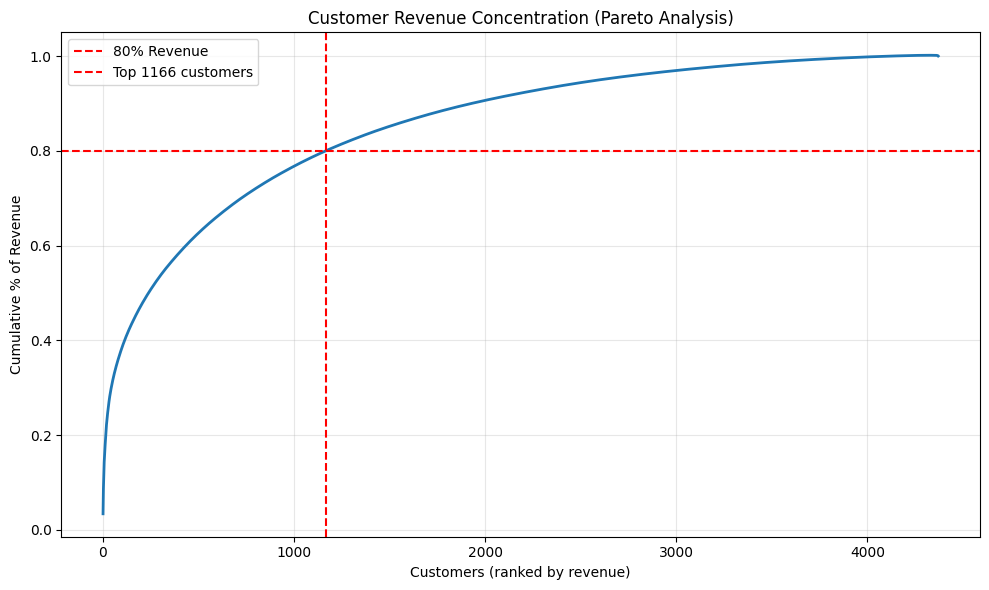

In [19]:
# Customer revenue distribution
customer_rev = df_customer.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
customer_cumulative = customer_rev.cumsum() / customer_rev.sum()

# 80/20 analysis
customers_80pct = (customer_cumulative <= 0.8).sum()
customers_80pct_share = customers_80pct / len(customer_rev) * 100

print(f"\nCustomer Concentration (80/20 Rule):")
print(f"Top customers contributing to 80% of revenue: {customers_80pct:,}")
print(f"This represents {customers_80pct_share:.1f}% of all customers")

# Visualize customer concentration
plt.figure(figsize=(10,6))
plt.plot(range(1, len(customer_cumulative)+1), customer_cumulative.values, linewidth=2)
plt.axhline(0.8, color='red', linestyle='--', label='80% Revenue')
plt.axvline(customers_80pct, color='red', linestyle='--', label=f'Top {customers_80pct} customers')
plt.title("Customer Revenue Concentration (Pareto Analysis)")
plt.xlabel("Customers (ranked by revenue)")
plt.ylabel("Cumulative % of Revenue")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [20]:
# Final Summary
print("\n" + "="*50)
print("ANALYSIS SUMMARY")
print("="*50)

print("Key Findings:")
print(f"1. Geographic: UK dominates with {top_share:.1f}% of revenue")
print(f"2. Customer Concentration: {customers_80pct_share:.1f}% of customers drive 80% of revenue")
print(f"3. Returns Impact: {returns_pct:.1f}% of gross revenue lost to returns")
print(f"4. Customer Segments: {len(valid_rfm[valid_rfm['Segment'] == 'Champion'])} Champions, {len(valid_rfm[valid_rfm['Segment'] == 'At Risk'])} At Risk")
print(f"5. Data Quality: {(len(df_customer)/len(df)*100):.1f}% of transactions have valid CustomerID")

print("\nBusiness Recommendations:")
print("- Focus retention efforts on 'At Risk' segment")
print("- Investigate high return rates for profitability optimization")
print("- Expand successful UK model to top international markets")
print("- Develop targeted campaigns for each customer segment")


ANALYSIS SUMMARY
Key Findings:
1. Geographic: UK dominates with 84.0% of revenue
2. Customer Concentration: 26.7% of customers drive 80% of revenue
3. Returns Impact: 8.4% of gross revenue lost to returns
4. Customer Segments: 1259 Champions, 343 At Risk
5. Data Quality: 75.2% of transactions have valid CustomerID

Business Recommendations:
- Focus retention efforts on 'At Risk' segment
- Investigate high return rates for profitability optimization
- Expand successful UK model to top international markets
- Develop targeted campaigns for each customer segment
